In [69]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, RBF

import numpy as np
from numpy import random as rand
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
import sklearn as skl
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

In [13]:
def f(x,y):

    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
        
    return  term1 + term2 + term3 + term4

In [99]:
def f_noisy(x,y, noise=0.1):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    
    # stochastic noise
    dim0, dim1 = np.shape(x)
    noise *= np.random.normal(0,1, [dim0, dim1])
    
    return term1 + term2 + term3 + term4 + noise

In [100]:
# sample data points from f 
x1 = np.arange(0, 1, 0.05)
x2 = np.arange(0, 1, 0.05)
x1, x2 = np.meshgrid(x1,x2)
y = f(x1,x2)

# create labels and features 
features = np.stack([np.ndarray.flatten(x1), np.ndarray.flatten(x2)], axis=1)
labels = np.ndarray.flatten(y)

test_size = 200
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# sample data points from  noisy f 
x1n = np.arange(0, 1, 0.05)
x2n = np.arange(0, 1, 0.05)
x1n, x2n = np.meshgrid(x1n,x2n)
yn = f_noisy(x1n,x2n)

# create labels and features 
featuresn = np.stack([np.ndarray.flatten(x1n), np.ndarray.flatten(x2n)], axis=1)
labelsn = np.ndarray.flatten(yn)

test_size = 200
Xn_train, Xn_test, yn_train, yn_test = train_test_split(featuresn, labelsn, test_size=0.2, random_state=42)

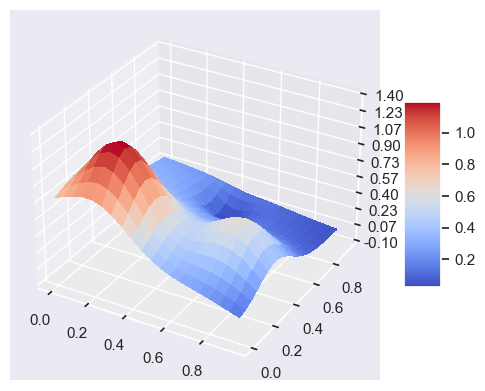

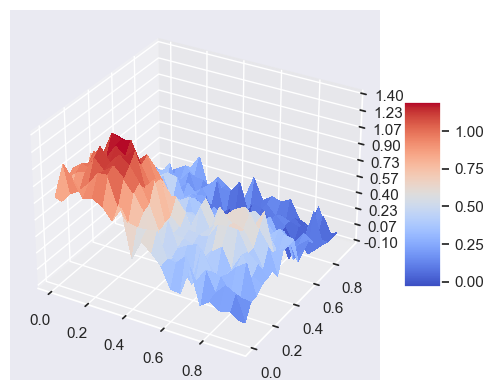

In [101]:
# Plot Franke Function
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x1, x2, y, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Plot noisy Franke Function
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x1n, x2n, yn, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

C:\Users\franscho\AppData\Local\Temp\ipykernel_12548\961531711.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scat = ax.scatter(X_train[ :,0], X_train[ :,1], y_train, cmap=cm.coolwarm, linewidth=0, antialiased=False)


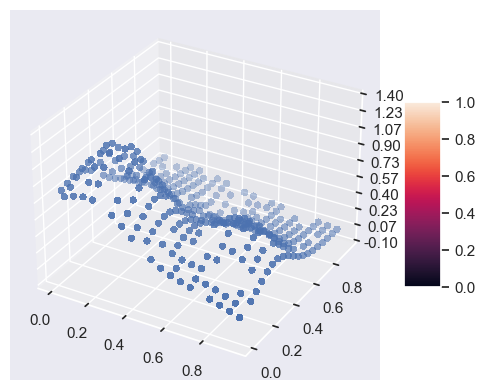

C:\Users\franscho\AppData\Local\Temp\ipykernel_12548\961531711.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scat = ax.scatter(Xn_train[ :,0], Xn_train[ :,1], yn_train, cmap=cm.coolwarm, linewidth=0, antialiased=False)


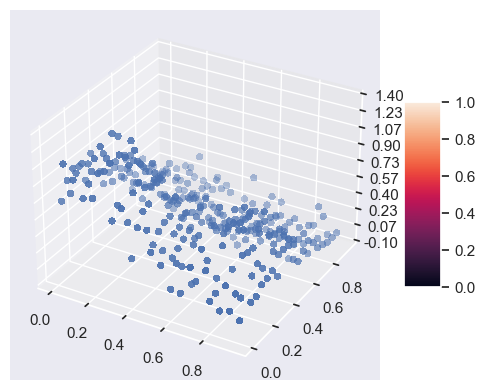

In [102]:
# Plot sampled data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scat = ax.scatter(X_train[ :,0], X_train[ :,1], y_train, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(scat, shrink=0.5, aspect=5)
plt.show()

# Plot sampled data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scat = ax.scatter(Xn_train[ :,0], Xn_train[ :,1], yn_train, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(scat, shrink=0.5, aspect=5)
plt.show()

In [103]:
#input features from training data 
x1 = np.linspace(X_train[:,0].min(), X_train[:,0].max()) 
x2 = np.linspace(X_train[:,1].min(), X_train[:,1].max()) 
x = (np.array([x1, x2])).T

#input features from training data 
x1n = np.linspace(Xn_train[:,0].min(), Xn_train[:,0].max()) 
x2n = np.linspace(Xn_train[:,1].min(), Xn_train[:,1].max()) 
xn = (np.array([x1n, x2n])).T

In [104]:
kernel = C(1.0, (1e-3, 1e3)) * RBF([5,5], (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)
gp.fit(X_train, y_train)

x1x2 = np.array(list(product(x1, x2)))
y_pred, MSE = gp.predict(x1x2, return_std=True)


#noisy
gp.fit(Xn_train, yn_train)

x1x2n = np.array(list(product(x1n, x2n)))
yn_pred, MSE = gp.predict(x1x2n, return_std=True)

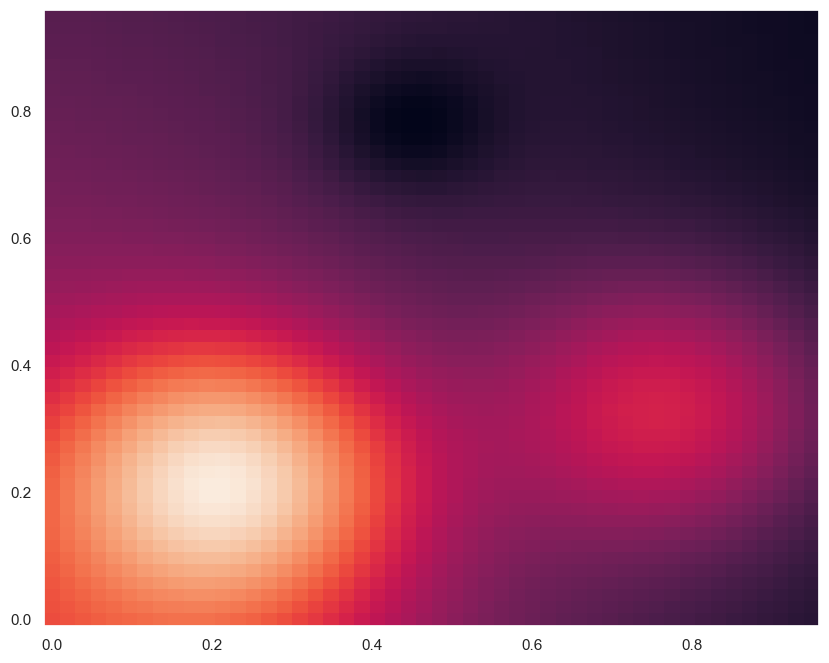

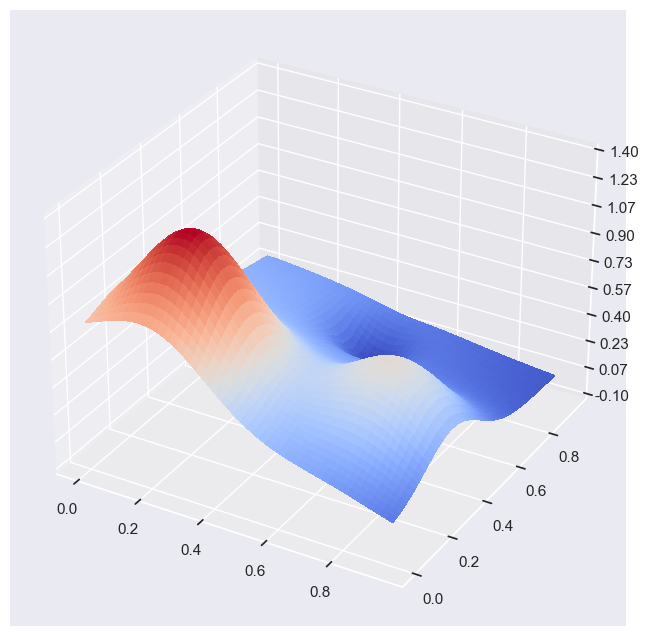

In [105]:
#prediction results
X0p, X1p = x1x2[:,0].reshape(50,50), x1x2[:,1].reshape(50,50)
Zp = np.reshape(y_pred,(50,50))


#plot predictions
#2D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.pcolormesh(X0p, X1p, Zp)
plt.show()

#3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')    
surf = ax.plot_surface(X0p, X1p, Zp, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))        
plt.show()

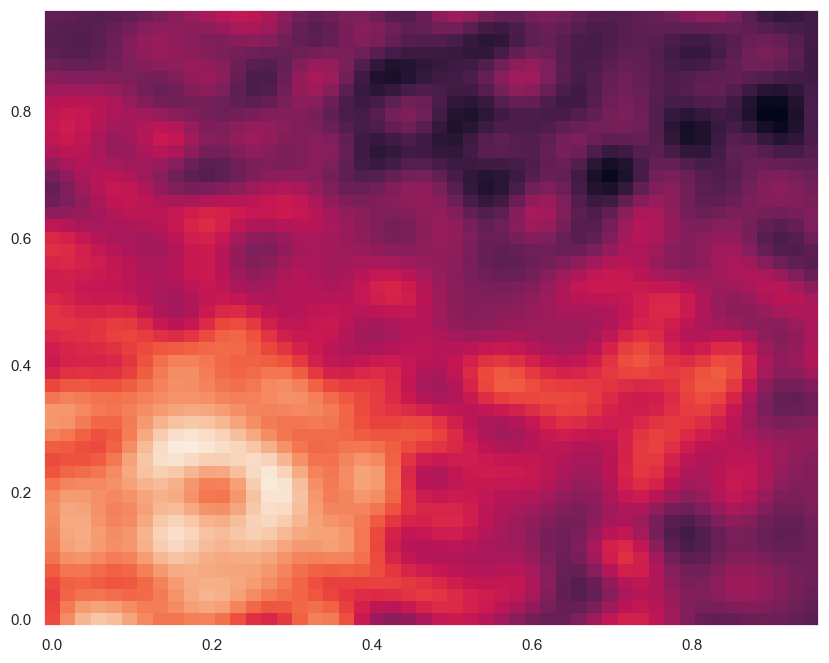

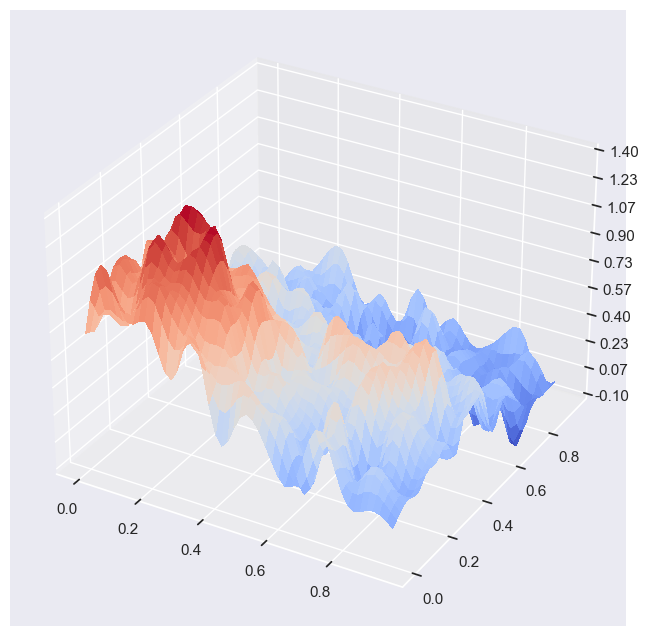

In [106]:
#prediction results noisy
X0pn, X1pn = x1x2n[:,0].reshape(50,50), x1x2n[:,1].reshape(50,50)
Zpn = np.reshape(yn_pred,(50,50))


#plot predictions
#2D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.pcolormesh(X0pn, X1pn, Zpn)
plt.show()

#3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')    
surf = ax.plot_surface(X0pn, X1pn, Zpn, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))        
plt.show()